In [1]:
cd("$(homedir())/Documents/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lihel\Documents\enso_project.jl`


In [2]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project

In [3]:
# read input data
df_train_data = CSV.read("data/train_sst_34_anomaly_embedded_15.txt", DataFrame; delim=',', ignorerepeated=true)
df_val_data = CSV.read("data/val_sst_34_anomaly_embedded_15.txt", DataFrame; delim=',', ignorerepeated=true)
df_test_data = CSV.read("data/test_sst_34_anomaly_embedded_15.txt", DataFrame; delim=',', ignorerepeated=true)

Row,Column1,Column2,Column3,Column4,Column5
,Float64,Float64,Float64,Float64,Float64
1,-0.33,0.39,-0.93,0.15,0.9
2,-0.26,0.28,-0.7,0.22,0.67
3,0.1,-0.06,-0.67,0.28,0.71
4,0.21,-0.32,-0.73,0.33,0.97
5,0.36,-0.37,-0.49,0.86,0.72
6,0.42,-0.91,-0.11,0.86,0.75
7,0.39,-0.93,0.15,0.9,0.6
8,0.28,-0.7,0.22,0.67,0.42
9,-0.06,-0.67,0.28,0.71,0.15


In [4]:
train_data = Matrix(transpose(Matrix(df_train_data)))

5×345 Matrix{Float64}:
  0.08  -0.2   -0.14   0.02   0.49  …  -0.11  -0.55  -0.92  -1.21  -1.31
  0.27   0.86   1.24   1.73   1.68     -1.44  -1.21  -1.48  -1.19  -0.83
  2.13   1.81   1.22   0.68   0.68     -0.39  -0.31  -0.19  -0.42  -0.67
 -0.33  -0.44  -0.38  -1.02  -1.29     -0.98  -0.99  -0.65  -0.55  -0.44
 -0.96  -0.16  -0.52  -0.54  -0.69     -0.19   0.24   0.27   0.68   0.44

In [5]:
val_data = Matrix(transpose(Matrix(df_val_data)))

5×74 Matrix{Float64}:
 -1.41  -1.44  -1.21  -1.48  -1.19  …  -0.42  -0.49  -0.43  -0.7   -0.64
 -0.76  -0.39  -0.31  -0.19  -0.42     -0.26   0.1    0.21   0.36   0.42
 -0.71  -0.98  -0.99  -0.65  -0.55      0.28  -0.06  -0.32  -0.37  -0.91
 -0.51  -0.19   0.24   0.27   0.68     -0.7   -0.67  -0.73  -0.49  -0.11
  0.36   0.5   -0.47  -0.48  -0.48      0.22   0.28   0.33   0.86   0.86

In [6]:
reservoir_sizes = [112, 300]
spectral_radii = [0.8, 1.0, 1.2]
sparsities = [0.03, 0.05]
input_scales = [0.1]
ridge_values = [0.0, 1e-6, 1e-5]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values)

36-element Vector{Any}:
 enso_project.ESNHyperparams(112, 0.8, 0.03, 0.1, 0.0)
 enso_project.ESNHyperparams(300, 0.8, 0.03, 0.1, 0.0)
 enso_project.ESNHyperparams(112, 1.0, 0.03, 0.1, 0.0)
 enso_project.ESNHyperparams(300, 1.0, 0.03, 0.1, 0.0)
 enso_project.ESNHyperparams(112, 1.2, 0.03, 0.1, 0.0)
 enso_project.ESNHyperparams(300, 1.2, 0.03, 0.1, 0.0)
 enso_project.ESNHyperparams(112, 0.8, 0.05, 0.1, 0.0)
 enso_project.ESNHyperparams(300, 0.8, 0.05, 0.1, 0.0)
 enso_project.ESNHyperparams(112, 1.0, 0.05, 0.1, 0.0)
 enso_project.ESNHyperparams(300, 1.0, 0.05, 0.1, 0.0)
 ⋮
 enso_project.ESNHyperparams(300, 1.0, 0.03, 0.1, 1.0e-5)
 enso_project.ESNHyperparams(112, 1.2, 0.03, 0.1, 1.0e-5)
 enso_project.ESNHyperparams(300, 1.2, 0.03, 0.1, 1.0e-5)
 enso_project.ESNHyperparams(112, 0.8, 0.05, 0.1, 1.0e-5)
 enso_project.ESNHyperparams(300, 0.8, 0.05, 0.1, 1.0e-5)
 enso_project.ESNHyperparams(112, 1.0, 0.05, 0.1, 1.0e-5)
 enso_project.ESNHyperparams(300, 1.0, 0.05, 0.1, 1.0e-5)
 enso_project.ESN

wee see that too big reservoir sizes cause singular matrices in the linear regression, thus we adapt the reservoir size to be smaller.

In [7]:
esn, W_out = enso_project.cross_validate_esn(train_data, val_data, param_grid)

enso_project.ESNHyperparams(112, 0.8, 0.03, 0.1, 0.0)
enso_project.ESNHyperparams(112, 1.0, 0.03, 0.1, 0.0)
enso_project.ESNHyperparams(112, 1.2, 0.03, 0.1, 0.0)


(ESN(5 => 112), OutputLayer successfully trained with output size: 5)

In [8]:
esn

ESN(5 => 112)

In [9]:
W_out

OutputLayer successfully trained with output size: 5

In [10]:
test_data = Matrix(transpose(Matrix(df_test_data)))

5×74 Matrix{Float64}:
 -0.33  -0.26   0.1    0.21   0.36  …  -0.93  -0.85  -0.93  -0.84  -0.69
  0.39   0.28  -0.06  -0.32  -0.37     -0.01   0.19   0.47   0.88   1.07
 -0.93  -0.7   -0.67  -0.73  -0.49      1.53   1.59   1.9    1.99   1.78
  0.15   0.22   0.28   0.33   0.86      1.24   0.81   0.31   0.24   0.21
  0.9    0.67   0.71   0.97   0.72     -0.15  -0.28  -0.14  -0.62  -0.71

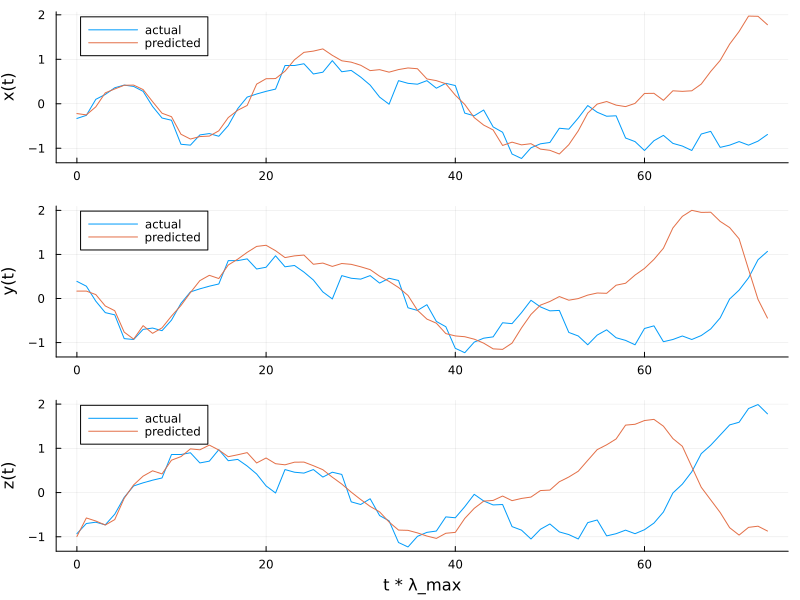

In [11]:
enso_project.plot_prediction(esn, W_out, test_data)